# Tutorial of `fitburst` -- I: Data I/O

As described in [its documentation](https://chimefrb.github.io/fitburst/), **fitburst** is designed to generate representative models of radio-astrophysical pulses through least-squares fitting against data. The first step in using **fitburst** is to supply data in a format that **fitburst** can understand. To this end, the **fitburst** codebase contains under-the-hood infrastructure for I/O of data in a "fitburst-generic" format defined on the documentation webpage. Once properly defined, the data-I/O operations are totally contained in the `DataReader` object, which reads in data and define all variables needed for downstream analysis.

This first tutorial demonstrates the use and features of the `DataReader` object on data in fitburst-generic format.

## Step 1: instantiate the `DataReader` Object 

In principle, the `DataReader` object can be initialized with a few lines:

In [2]:
# import the necessary utilities.
from fitburst.backend.generic import DataReader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# initialize the DataReader object.
input_file = "./data_fitburst_CHIMEFRB_StokesI_FRB20220502B.npz"
data = DataReader(input_file)

# the spectrum is contained in the 'data_full' attribute; 
# print data.data_full to see what the data look like.
print(data.data_full)

None


For fitburst-generic formatted data, the `DataReader` object does not immediately open the file referred to in the `input_file` variable and overload all `DataReader` attributes. It is for this reason that the `data_full` attribute is empty (and initialized to `None`). This feature is currently enabled to allow for the creation of `DataReader` instances that can be overloaded with fake/simulated data. 

## Step 2: execute the `load_data()` method

For this tutorial, we want to read in data from a `fitburst`-generic formatted file. This task requires the addition of one more line that calls the `load_data()` method:

In [5]:
# now truly load in data, overloading all DataReader attribute with the 
# contents of the file pointed to in the 'input_file' variable.
data.load_data()

# now try printing again.
print(data.data_full)
print(f"data type: {type(data.data_full)}")
print(data.data_full.shape)

[[-0.16630322 -0.04174602 -0.15111327 ...  0.17694044 -0.06125951
   0.37672102]
 [-0.07389635  0.06861627  0.06558394 ...  0.132514   -0.08605832
   0.11717558]
 [-0.02809006 -0.13762683  0.10883093 ...  0.1787647   0.02869701
   0.22493935]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
data type: <class 'numpy.ndarray'>
(16384, 162)


It now looks like we can access data!

## Step 3: access basic information on the dynamic spectrum

The `DataReader` contains the basic information that define the dynamic spectrum, such as the time/frequency axes and their resolutions.

This spectrum spans 16384 frequency channels and 162 time samples.
The lowest and highest frequencies are 400.23 and 800.21 MHz, respectively.
... the total bandwidth is 399.9755859375 MHz


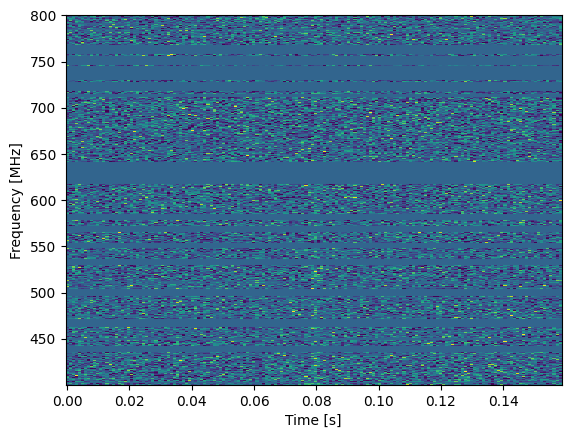

In [7]:
# grab info on the spectrum contained in the file referred to in 'input_file'.
spectrum = data.data_full
res_freq = data.res_freq
res_time = data.res_time
freqs = data.freqs
times = data.times

# all vectorized data are contained in NumPy arrays, and so we can use NumPy to
# access info via NumPy attributes. for example, the data_full object 
# is a matrix of intensity values with size (num_freq x num_time).
num_freq, num_time = spectrum.shape

# these same data are also contained as attributes in the DataReader object.
num_freq = data.num_freq
num_time = data.num_time

# now derive and print some info.
bandwidth = freqs[-1] - freqs[0]
print(f"This spectrum spans {num_freq} frequency channels and {num_time} time samples.")
print(f"The lowest and highest frequencies are {freqs[0]:.2f} and {freqs[-1]:.2f} MHz, respectively.")
print(f"... the total bandwidth is {bandwidth} MHz")

# now create a plot of the data.
plt.pcolormesh(times, freqs, spectrum, vmin=0.5*spectrum.min(), vmax=0.5*spectrum.max())
plt.xlabel(f"Time [s]")
plt.ylabel(f"Frequency [MHz]")
plt.show()

The fitburst-generic formatted file also contains other information, such as "metadata" and values of burst parameters. The metadata include information on the data mask (or `data_weigths`), which is a matrix in size equal to `data_full` that contain 1s for usable data, and 0s for masked data.

In [44]:
weights = np.array(data.data_weights)
good_freq = np.sum(weights, axis=1) > 1
num_freq_good = sum(good_freq)
num_freq_bad = num_freq - num_freq_good

print(f"Of the {num_freq} total channels, there are {num_freq_good} good frequencies")

Of the 16384 total channels, there are 10712 good frequencies


## Step 4: access burst parameters

The `fitburst`-generic data also contain information on the model of the dynamic spectrum contained in the file. These parameters are contained in the `burst_parameters` attribute of the `DataReader` object, in a Python dictionary. These parameters will be described further in Tutorial #3.

In [8]:
# look at burst parameters in overloaded DataReader.
params = data.burst_parameters
print(params)

{'amplitude': [-0.4812764314320905], 'arrival_time': [1060314.803224573], 'burst_width': [0.00027258462551453457], 'dm': [623.684276828633], 'dm_index': [-2.0], 'scattering_timescale': [0.0], 'scattering_index': [-4.0], 'spectral_index': [2.8705490561459213], 'spectral_running': [-15.86167822219646], 'ref_freq': [400.1953125]}
